# XGBoost (3 балла)

<b>XGBoost</b> — алгоритм машинного обучения, основанный на дереве поиска решений и использующий фреймворк градиентного бустинга. Все остальные алгоритмы или фреймворки в задачах предсказания, использующих неструктурированные данные (например, изображения или текст), превосходит искусственная нейронная сеть. Однако, когда речь идет о структурированных или табличных данных небольших размеров, наиболее эффективными оказываются алгоритмы, основанные на дереве поиска решений.

На инфографике можно просмотреть эволюцию таких алгоритмов.

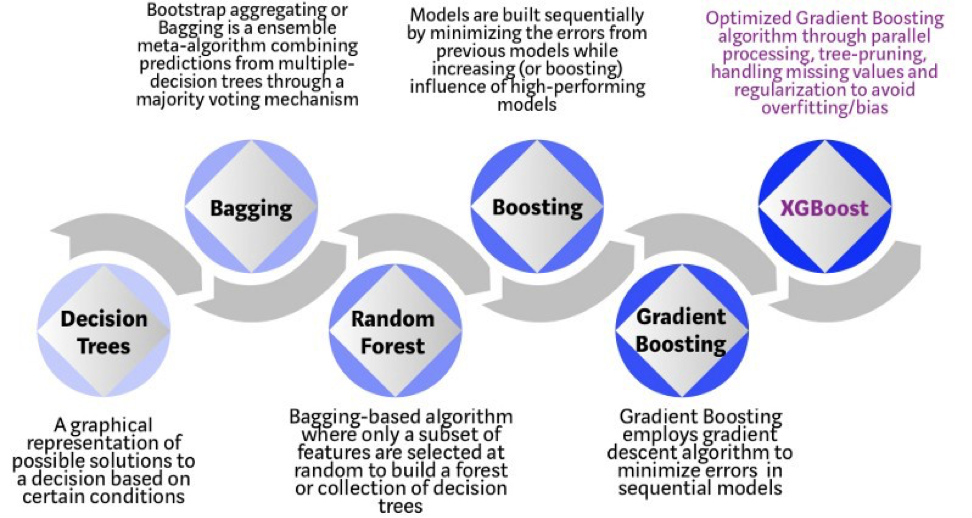

XGBoost изначально разрабатывался как исследовательский проект Вашингтонского Университета. Tianqi Chen и Carlos Guestrin представили свою работу на конференции SIGKDD в 2016 году и произвели фурор в мире машинного обучения. С момента введения в использование созданный ими алгоритм не только лидировал в соревнованиях Kaggle, но и был основой нескольких передовых отраслевых приложений. В результате образовалось общество специалистов по анализу данных, вносящих вклад в проекты XGBoost с открытым исходным кодом с ~350 участниками и ~3,600 коммитами на GitHub.
Особенности данного фреймворка:
1.	Широкая область применения: может быть использован для решения задач регрессии, классификации, упорядочения и пользовательских задач на предсказание.
2.	Совместимость с Windows, Linux и OS X.
3.	Поддержка большинства ведущих языков программирования, к примеру таких как C++, Python, R, Java, Scala и Julia.
4.	Облачная интеграция: поддерживает кластеры AWS, Azure и Yarn, хорошо работает с Flink, Spark.

## Интуиция за алгоритмом

Дерево принятия решений — простой в визуализации и достаточно понятный алгоритм. Однако интуиция для построения следующего поколения алгоритмов, основывающихся на деревьях, несколько сложнее.

Этапы эволюции алгоритмов, основанных на деревьях, могут быть объяснены через сравнение с некоторой версией хода собеседования при приеме на работу. Можно выделить следующие этапы:
1.	<b>Дерево принятия решений</b>: Каждый специалист по подбору персонала при собеседовании кандидата ориентируется по своему списку критериев: образование, опыт работы, успешность прохождения собеседования.
2.	<b>Бэггинг</b>: Вместо одного специалиста по подбору персонала за каждым кандидатом наблюдают несколько и каждый из них имеет возможность проголосовать. Этот алгоритм при принятии окончательного решения учитывает все высказанные мнения.
3.	<b>Случайный лес</b>: Этот алгоритм основан на бэггинге и отличается тем, что выбирает случайные признаки. То есть, в сравнении с собеседованием получается, что на данном этапе каждый специалист по подбору персонала может проверить знания кандидата лишь в какой-то одной случайно выбранной области.
4.	<b>Бустинг</b>: Это альтернативный подход, в котором каждый специалист по подбору персонала основывается на оценке кандидата предыдущим специалистом. Это ускоряет процесс собеседования, так как не подходящие кандидаты сразу же отсеиваются.
5.	<b>Градиентный бустинг</b>: Частный случай бустинга, в котором ошибка минимизируется алгоритмом градиентного спуска. То есть, наименее квалифицированные кандидаты отсеиваются как можно раньше.
6.	<b>XGBoost</b>: Усиленная версия градиентного бустинга (экстремальная). Это идеальная комбинация оптимизации ПО и железа для получения точных результатов за короткое время с минимальным использованием вычислительных ресурсов.

## Причины высокой производительности XGBoost 

XGBoost и Gradient Boosting Machines (GBM) — ансамбли методов деревьев, которые используют принцип бустинга слабых учеников (чаще всего, алгоритм построения бинарного дерева решений) при помощи архитектуры градиентного спуска. В свою очередь, XGBoost — улучшение фреймворка GBM через системную оптимизацию и усовершенствование алгоритма.

Системная оптимизация:
1.	<b>Параллелизация</b>: В XGBoost построение деревьев основано на параллелизации. Это возможно благодаря взаимозаменяемой природе циклов, используемых для построения базы для обучения: внешний цикл перечисляет листья деревьев, внутренний цикл вычисляет признаки. Нахождение цикла внутри другого мешает параллелизировать алгоритм, так как внешний цикл не может начать своё выполнение, если внутренний ещё не закончил свою работу. Поэтому для улучшения времени работы порядок циклов меняется: инициализация проходит при считывании данных, затем выполняется сортировка, использующая параллельные потоки. Эта замена улучшает производительность алгоритма, распределяя вычисления по потокам.
2.	<b>Отсечение ветвей дерева</b>: В фреймворке GBM критерий остановки для разбиения дерева зависит от критерия отрицательной потери в точке разбиения. XGBoost использует параметр максимальной глубины "max_depth" вместо этого критерия и начинает обратное отсечение. Этот “глубинный” подход значительно улучшает вычислительную производительность.
3.	<b>Аппаратная оптимизация</b>: Алгоритм был разработан таким образом, чтобы он оптимально использовал аппаратные ресурсы. Это достигается путём создания внутренних буферов в каждом потоке для хранения статистики градиента. Дальнейшие улучшения, как, например, вычисления вне ядра, позволяют работать с большими наборами данных, которые не помещаются в памяти компьютера.

Улучшения алгоритма:
1.	<b>Регуляризация</b>: Алгоритм штрафует сложные модели, используя как регуляризацию LASSO (L1), так и Ridge-регуляризацию (L2) для того, чтобы избежать переобучения.
2.	<b>Работа с разреженными данными</b>: Алгоритм упрощает работу с разреженными данными, в процессе обучения заполняя пропущенные значения в зависимости от значения потерь. Кроме того, алгоритм позволяет работать с различными узорами разреженности.
3.	<b>Метод взвешенных квантилей</b>: XGBoost использует его для того, чтобы наиболее эффективно находить оптимальные точки разделения в случае работы со взвешенным датасетом.
4.	<b>Кросс-валидация</b>: Алгоритм использует свой собственный метод кросс-валидации на каждой итерации. То есть, нет необходимости отдельно программировать этот поиск и определять количество итераций бустинга для каждого запуска.

Для сравнения работы алгоритма XGBoost с некоторыми другими алгоритмами был использован датасет Scikit-learn “Make_Classification”. С его помощью был создан миллион объектов с 20 признаками (из них 2 информативных и 2 излишних). Далее выбранные алгоритмы (XGBoost, логистическая регрессия, случайный лес и стандартный градиентный бустинг) были протестированы с использованием созданного датасета.

Результат сравнения представлен на рисунке ниже: в левом столбце указана достигнутая точность предсказания алгоритма, в правом - время, затраченное на его обучение.

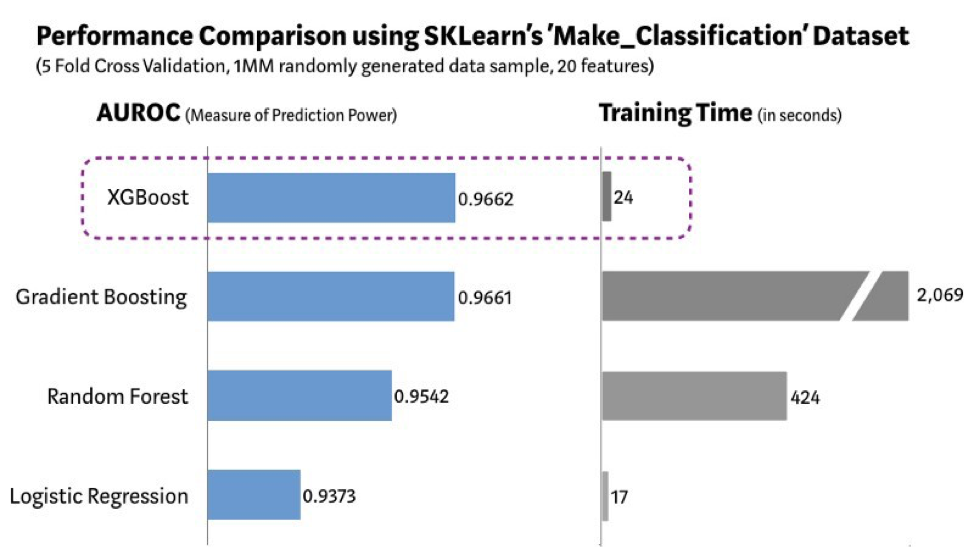

Как можно увидеть на графике, модель, использующая алгоритм XGBoost, может похвастаться лучшей комбинацией “производительность-время обучения” среди прочих. Именно это сочетание скорости и точности послужило причиной тому, что XGBoost достаточно часто используется в соревнованиях по анализу данных.

Несмотря на это, когда дело доходит до машинного обучения, универсальных решений не существует. Для решения определённой задачи необходимо рассматривать разные варианты алгоритмов, чтобы выявить лучший из них. Помимо этого, необходимо настраивать алгоритмы путём подбора различных в зависимости от каждого набора данных гиперпараметров. Также немаловажным в выборе алгоритма является его сложность, понятность и лёгкость имплементации.

## Работа с XGBoost

В первую очередь необходимо установить библиотеку XGBoost.

In [1]:
pip install xgboost

You should consider upgrading via the '/Users/olga/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Затем импортируем библиотеку и загружаем используемый набор данных. В этом примере используется датасет цветов радужной оболочки.

In [2]:
from sklearn import datasets
import xgboost as xgb

iris = datasets.load_iris()
x = iris.data # выделяем в отдельную переменную свойства набора данных
y = iris.target # выделяем в отдельную переменную целевой признак

Далее необходимо создать тестовую и тренировочную часть выборки, а также преобразовать данные в более удобный для обработки алгоритмом формат "DMatrix".

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#преобразование данных в пригодный для использования формат
d_train = xgb.DMatrix(X_train, label = y_train)
d_test = xgb.DMatrix(X_test, label = y_test)

Теперь, когда данные загружены, можно определить параметры ансамбля повышения градиента. Ниже указаны настройки некоторых наиболее важных параметров для начала работы.

In [4]:
params = {'eta': 0.3, 
          'max_depth': 3,  
          'objective': 'multi:softprob',  
          'num_class': 3} 

steps = 20  # Количество итераций обучения

Простейшими параметрами алгоритма являются
1. 'max_depth' (максимальная глубина обучаемых деревьев решений, при достижении которой построение ветви завершается)
2. 'objective'(используемая функция потерь)
3. 'num_class'(количество классов в наборе данных)
4. 'eta' (уменьшение размера шага, используемое, чтобы предотвратить переоснащение: после каждого шага бустинга можно напрямую получить веса новых функций, 'eta' уменьшает веса функций, чтобы сделать процесс бустинга более консервативным)

Gradient Boosting включает в себя последовательное создание и добавление деревьев решений в модель ансамбля. Новые деревья создаются для исправления остаточных ошибок в прогнозах существующего ансамбля.

Природа ансамбля, то есть наличие нескольких моделей, объединенных в очень сложную модель, делает эту технику склонной к переоснащению, предотвратить которое помогает параметр 'eta'.

'Eta' можно рассматривать более интуитивно как скорость обучения. Вместо добавления в ансамбль прогнозов новых деревьев с полным весом, 'eta' будет умножаться на добавляемые остатки, чтобы уменьшить их вес. Это эффективно уменьшает сложность общей модели.

Обычно используются небольшие значения в диапазоне от 0,1 до 0,3. Меньший вес этих остатков по-прежнему поможет нам обучить мощную модель, но не позволит этой модели уйти в глубокую сложность, где с большей вероятностью произойдет переобучение.

Далее переходим к обучению и тестированию модели.

In [6]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

model = xgb.train(params, d_train, steps) #обучение модели

preds = model.predict(d_test) #построение предсказаний на тестовой выборке
best_preds = np.asarray([np.argmax(line) for line in preds])

# оценка точности алгоритма
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

[23:33:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Precision = 0.9305555555555555
Recall = 0.9305555555555555
Accuracy = 0.9333333333333333


Как видим из результата оценки точности (точность предсказаний выше 90%), при помощи алгоритма XGBoost была построена очень хорошая модель.

### Дальнейшее изучение XGBoost

Рассмотренный пример использования практически полностью демонстрирует основы XGBoost. Но есть еще несколько интересных функций, которые помогут максимально эффективно использовать модели:
- Параметр "gamma" также может помочь контролировать переоснащение. Он определяет минимальное снижение потерь, необходимое для создания следующего раздела на листовом узле дерева. То есть, если создание нового узла не уменьшает потери на определенную величину, то алгоритм вообще не будет его создавать.
- Параметр "booster" позволяет установить тип модели, которая будете использоваться при построении ансамбля. По умолчанию используется "gbtree", который строит ансамбль деревьев решений. Если данные не слишком сложные, можно воспользоваться более быстрым и простым вариантом — "gblinear", который позволяет построить ансамбль линейных моделей.

Установка оптимальных гиперпараметров для любой модели машинного обучения может быть сложной задачей.
Поэтому отличным решением будет позволить Scikit Learn осуществить подбор самостоятельно. Поиск по сетке Scikit Learn довольно легко объединить с классификатором XGBoost:

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {"eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
             }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

С большим набором данных стоит осуществлять такой поиск только в том случае, если не ограничено время, так как поиск по сетке, по сути, многократно тренирует ансамбль деревьев решений.

После того, как модель XGBoost обучена, можно записать её удобочитаемое описание в текстовый файл, используя следующий код:

In [7]:
model.dump_model('dump.raw.txt')

Фрагмент содержимого созданного файла продемонстрирован на скриншоте ниже.

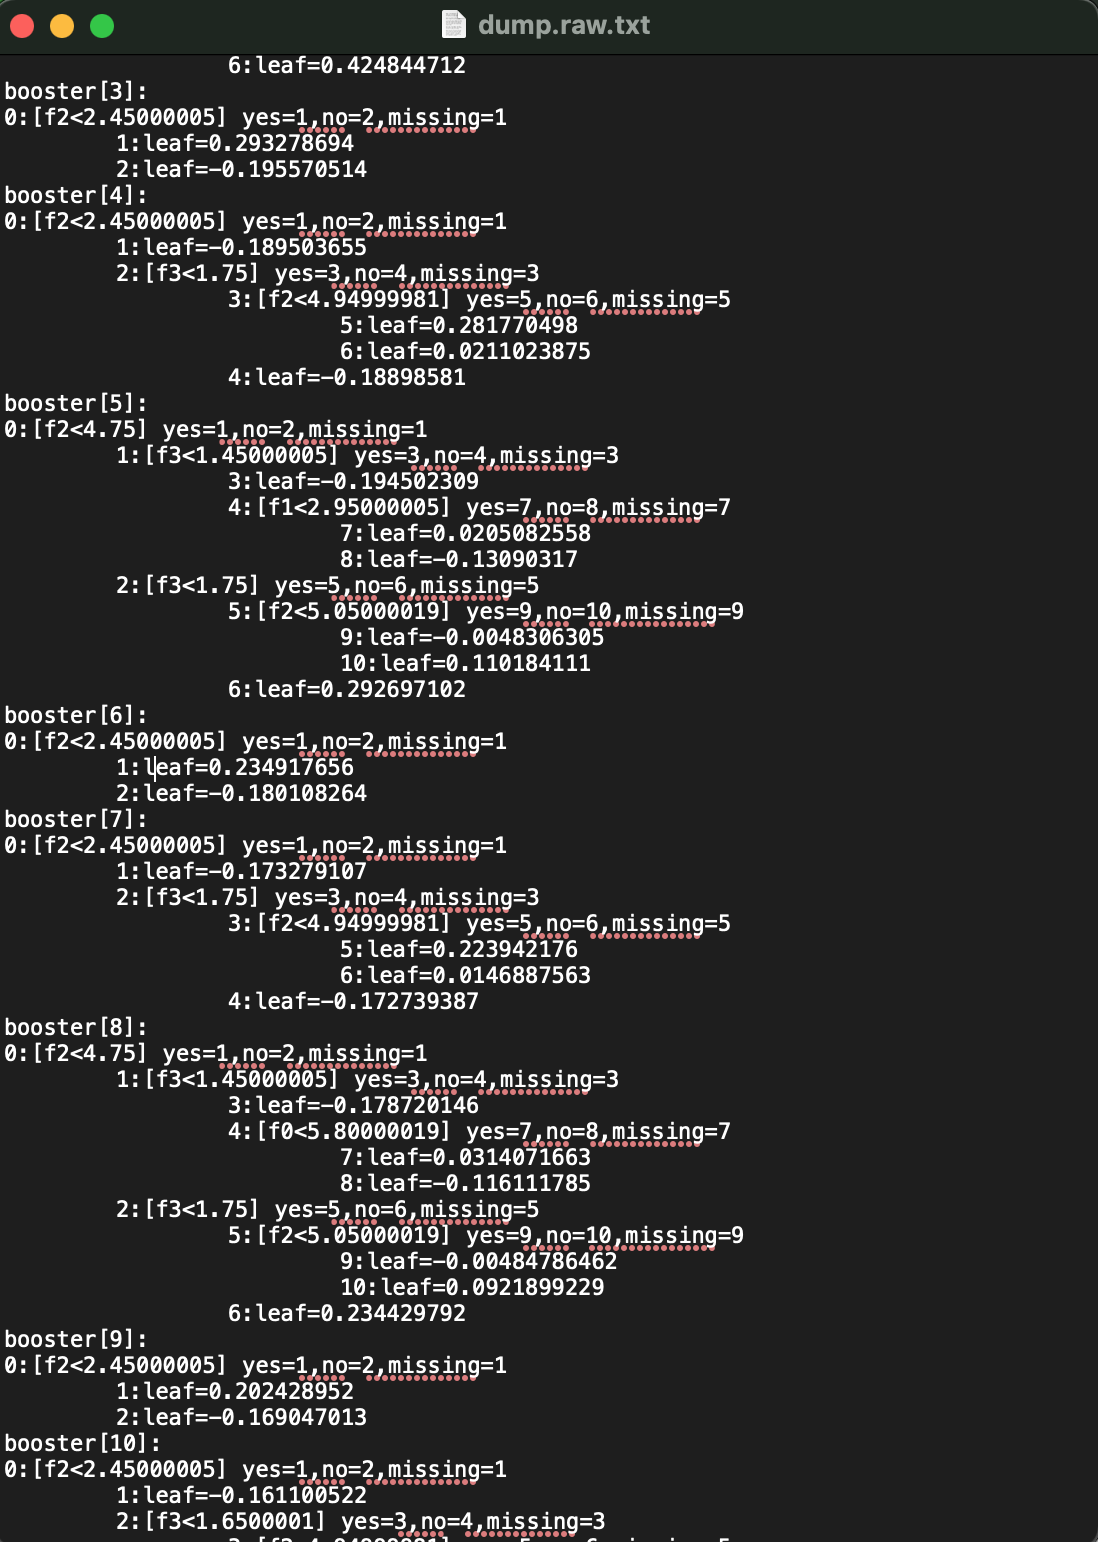